# Анализ рынка компьютерных игр для интернет-магазина 'Стримчик'

## Описание
Интернет-магазин "Стримчик" является крупным продавцом компьютерных игр, предоставляющим свой ассортимент клиентам по всему миру. Данный проект направлен на анализ исторических данных о продажах игр, оценках пользователей и экспертов, а также других факторов, таких как жанры и платформы.

## Цель
Проанализировать исторические данные до 2016 года и выявить факторы, влияющие на успешность компьютерных игр. Создать прогнозные модели, которые могут быть использованы для планирования рекламных кампаний и принятия решений о стратегии продаж на 2017 год и в долгосрочной перспективе.

## План работы:
1. Открытие файла и изучение данных
2. Подготовка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод

## Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 1. Открытие файла и изучение данных

Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

ВЫВОД:

Видим довольно много пропусков,

Year_of_Release и Critic_Score	- имеют формат float, а должен быть int,

User_Score - имеет тип object, а должен быть float.

Ненужные пропуски в столбцах Name и Genre, возникшие видимо либо ввиду отсутствия оценки игры, либо ввиду технической ошибки

# Шаг 2. Подготовка данных

Необходимо подготовить данные:

- Проверить датафрейм на дубликаты;
- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
- Обработать пропуски при необходимости:
- Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
- Описать причины, которые могли привести к пропускам;
- Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

In [6]:
# Проверка явных дубликатов
games.duplicated().sum()

0

In [7]:
# Проверка неявных дубликатов
duplicates = games[games.duplicated(['Year_of_Release', 'Platform', 'Name'], keep=False)]

# Вывести все строки с дубликатами
print(duplicates)

                Name Platform  Year_of_Release   Genre  NA_sales  EU_sales  \
604    Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
659              NaN      GEN           1993.0     NaN      1.78      0.53   
14244            NaN      GEN           1993.0     NaN      0.00      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports      0.00      0.01   

       JP_sales  Other_sales  Critic_Score User_Score Rating  
604        0.00         0.23          83.0        5.5      E  
659        0.00         0.08           NaN        NaN    NaN  
14244      0.03         0.00           NaN        NaN    NaN  
16230      0.00         0.00          83.0        5.5      E  


In [8]:
# Удаляем все дубликаты, оставив только первую появившуюся строку, так как 1 просто продублирована, а в двух недостает данных
games.drop_duplicates(['Name', 'Platform', 'Year_of_Release'], keep='first', inplace=True)

# Проверяем результат
duplicates = games[games.duplicated(['Year_of_Release', 'Platform', 'Name'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score, Rating]
Index: []


Дубликатов нет, можно об этом не думать

In [9]:
games.columns = games.columns.str.lower()

In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [11]:
#Заменим пропущенные значения на пустые строки, чтобы не создавать "заглушки" из нулей
games.fillna(
    {"name" : " ", 
     "genre" : " "}
    , inplace=True
)

In [12]:
# Смотрим уникальные значения столбца 'user_score'
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
# Заменяем значение "tbd" - "to be determined" на NaN
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

TBD - аббревиатура от английского To Be Determinedили To Be Decided - т.е данных (пока) нет

Скорее всего либо не было отзывов вообше, либо их было очень мало для формирования рейтинга

In [14]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Преобразуем данные в нужные типы на основании выводов в шаге 1:

In [15]:
#Приведем годы и оценки критиков к типу int
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')

#Оценки пользователей приведем к типу float
games['user_score'] = games['user_score'].astype('Float64')

In [16]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
#Заменим пропущенные значения на "unknown"
games["rating"] = games['rating'].fillna("unknown")

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [18]:
# Считаем суммы всех продаж
games['total_sales'] = games.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [19]:
# Проверим пропуски
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating                0
total_sales           0
dtype: int64

In [20]:
# Посмотрим на датафрейм
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,<NA>,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,<NA>,unknown,28.31


ВЫВОД: 

Получилось много пропусков в столбцах rating, critic_score, user_score.

- Новые игры: Некоторые игры могут быть слишком новыми и не успели получить оценки от критиков и пользователей к моменту сбора данных.

- Отсутствие данных: Для некоторых игр могут быть недоступны или не предоставлены данные об оценках и рейтинге.

- Неизвестные значения: В столбце 'rating' встречаются значения "unknown", что может означать, что рейтинг для этих игр неизвестен.

Для дальнейшего анализа важно учитывать эти пропуски и понимать, что они могут быть связаны с новизной игр или отсутствием данных.

In [21]:
# Комментарий ревьюера 0
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   Int64  
 9   user_score       7589 non-null   Float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Float64(1), Int64(2), float64(5), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' ' ' Beyblade Burst' ' Fire Emblem Fates' ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colore

# Шаг 3. Исследовательский анализ данных

Теперь нам необходимо провести исследование и ответить на следующие вопросы:

- Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывать в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

# Посмотрим, сколько игр выпускалось в разные годы:

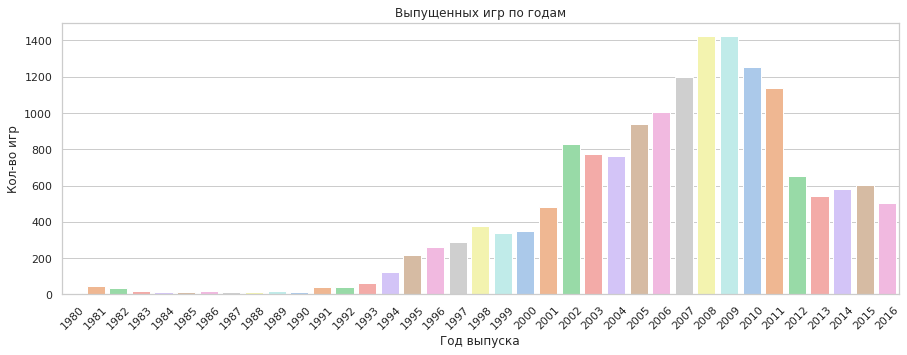

In [22]:
sns.set(style="whitegrid")

# Группируем данные по годам и считаем количество игр
df_to_plot = games.groupby('year_of_release')['name'].count().reset_index()

# Размер графика
fig, ax = plt.subplots(figsize=(15, 5))

# Строим график
sns.barplot(x='year_of_release', y='name', data=df_to_plot, ax=ax, palette="pastel")

# Настройки графика
ax.set(title='Выпущенных игр по годам', xlabel='Год выпуска', ylabel='Кол-во игр')
plt.xticks(rotation=45)

# Показываем график
plt.show()

Данные за все периоды нам не нужны - оставим данные только начиная с 1994 года.

Именно с этого момента начинается рост рынка видеоигр:

In [23]:
df_1994 = games[games['year_of_release']>=1994]

# Выберем платформы с наибольшими суммарными продажами и построим распределение по годам:

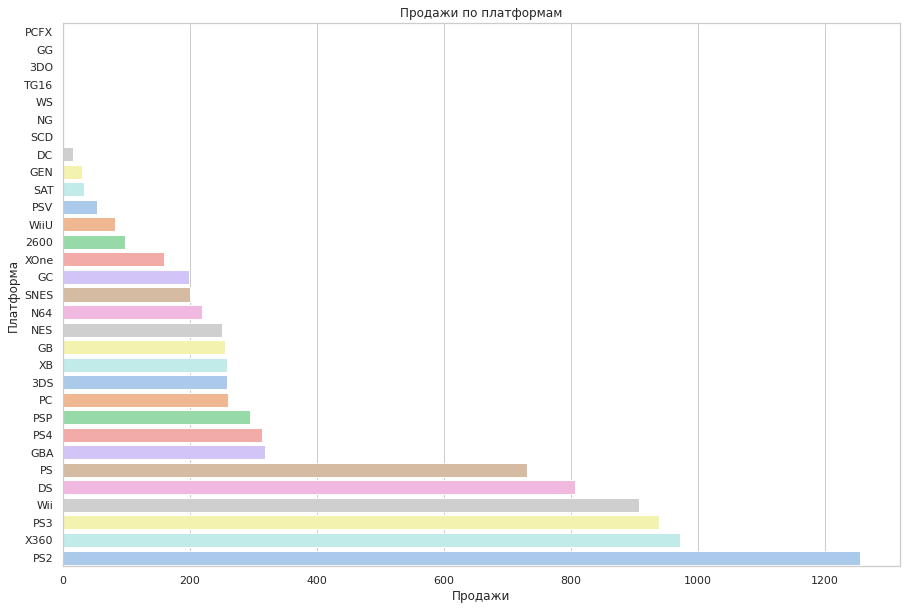

In [24]:
sns.set(style="whitegrid")

# Группируем данные по платформам и считаем сумму продаж
df_to_plot = games.groupby('platform')['total_sales'].sum().sort_values().reset_index()

# Размер графика
fig, ax = plt.subplots(figsize=(15, 10))

# Строим график
sns.barplot(x='total_sales', y='platform', data=df_to_plot, ax=ax, palette="pastel")

# Настройки графика
ax.set(title='Продажи по платформам', xlabel='Продажи', ylabel='Платформа')

# Показываем график
plt.show()

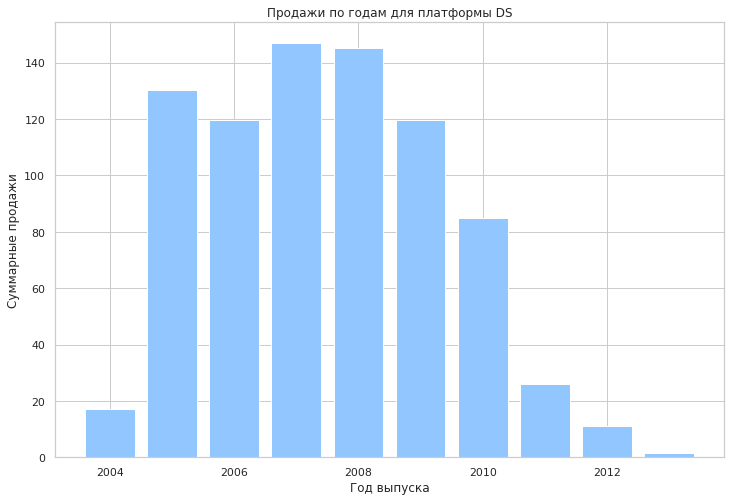

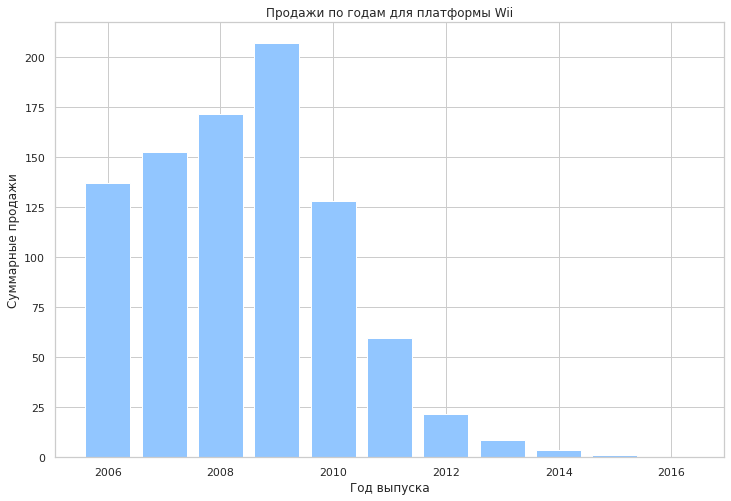

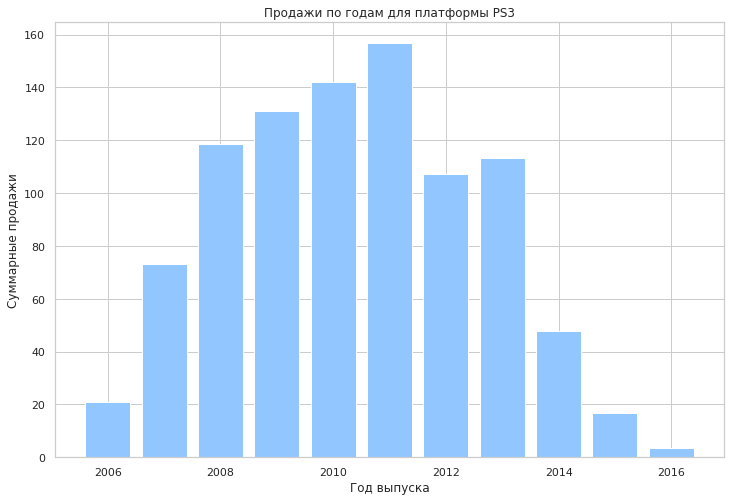

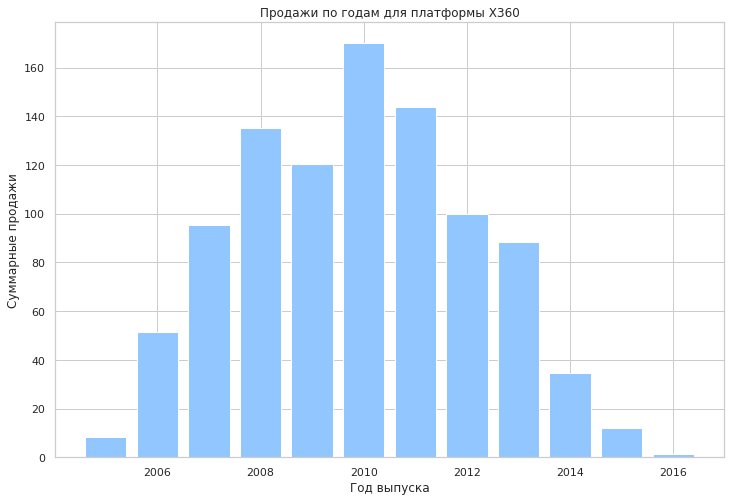

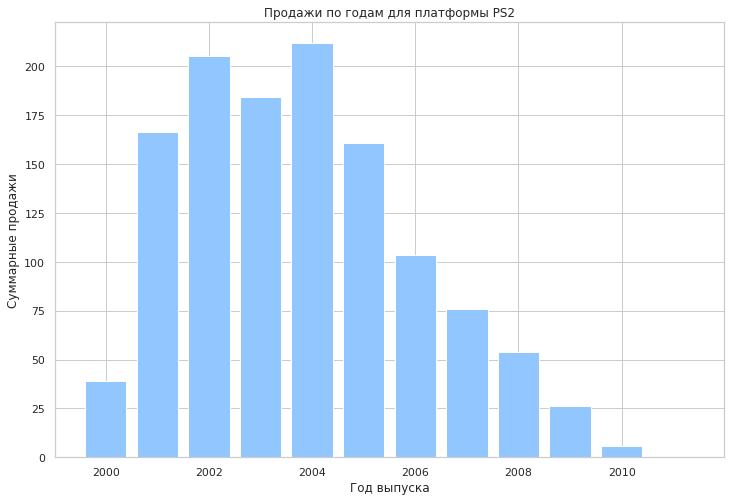

In [25]:
plt.style.use('seaborn-pastel')

# Выберем платформы с наибольшими суммарными продажами
platforms_leaders = df_1994.groupby('platform')['total_sales'].sum().sort_values()[-5:].index.tolist()

# Построим отдельные графики для каждой платформы
for platform in platforms_leaders:
    plt.figure(figsize=(12, 8))
    plt.bar(df_1994[df_1994.platform == platform].groupby("year_of_release")['total_sales'].sum().index,
            df_1994[df_1994.platform == platform].groupby("year_of_release")['total_sales'].sum())
    plt.title(f'Продажи по годам для платформы {platform}')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.show()

# Определим актуальный период:

Можно заметить, что каждая из платформ "прожила" примерно по 10 лет:

- PS2 с 2000 по 2010 (в точности 10 лет)
- DS с 2004 по 2013 (9 лет)
- X360 с 2006 по 2015 (9 лет)
- Wii 2006 - 2015 (9 лет)
- PS3 2006 - 2016 (10 лет)

Таким образом, в среднем консоль "живет" около 10 лет.

Для выбора актуального периода, который будет основой для оценки данных и построения предсказательных моделей на 2017 год, мы обратим внимание на динамику появления новых платформ. Многие платформы того времени, такие как Wii, PS3 и X360, появились в 2006 году, а их срок "жизни" составляет примерно 10 лет

Однако, к 2013 году мы наблюдаем заметный спад востребованности, а также рост других платформ, которые становятся более актуальными к настоящему времени

Таким образом, мы сосредоточимся на более поздних данных, начиная примерно с 2013 года, чтобы учесть современные тенденции и отбросить устаревшие платформы

In [26]:
# Комментарий ревьюера
temp = games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

# Данные вне актуального периода НЕ учитываем:

In [27]:
games = games[games['year_of_release']>=2013]

# Определим платформы, лидирующие по продажам:

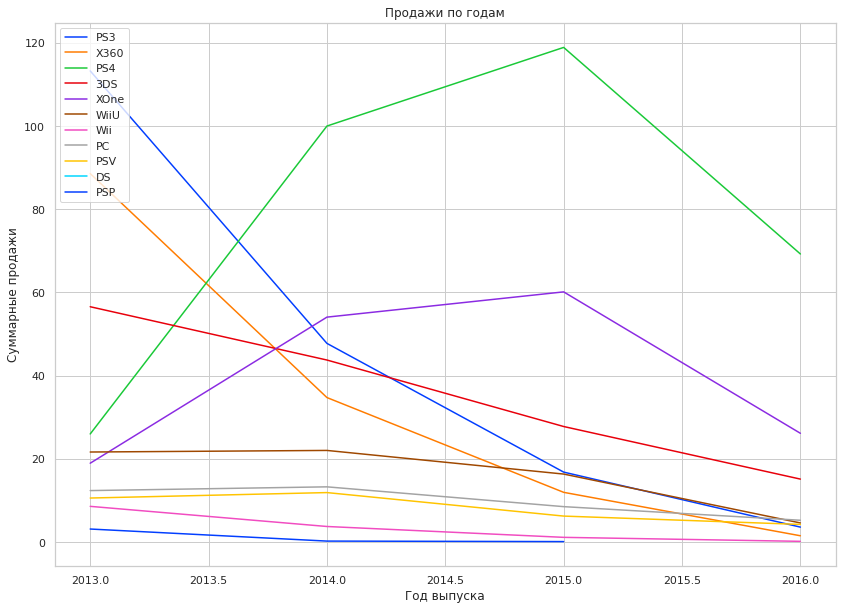

In [28]:
# Создадим список цветов для графиков различных платформ
palette = sns.color_palette("bright", len(games['platform'].unique()))

# Используем цикл для построения графиков для каждой платформы
plt.figure(figsize=(14, 10))
for i, platform in enumerate(games['platform'].unique()):
    plt.plot(games[games['platform'] == platform].groupby("year_of_release")['total_sales'].sum().index,
             games[games['platform'] == platform].groupby("year_of_release")['total_sales'].sum(),
             label=platform,
             color=palette[i])

# Настройка параметров графика
plt.title('Продажи по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

На конец 2016 года лидируют по продажам следующие платформы:

- PS4;
- Xone;
- 3DS.

Также на графике можно видеть общую тенденцию снижения продаж

# Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

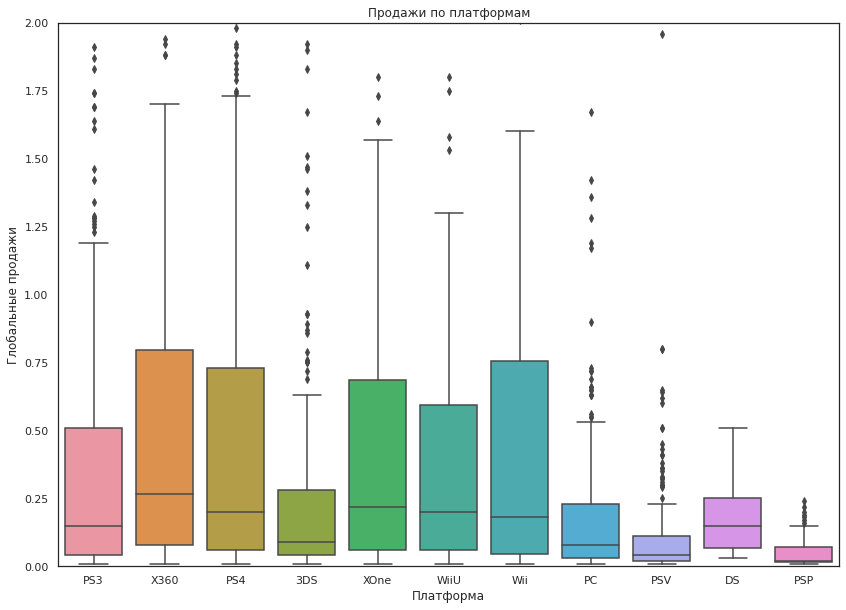

In [29]:
sns.set(style="white")

# Используем цикл для построения "ящика с усами" для каждой платформы
plt.figure(figsize=(14, 10))
sns.boxplot(x='platform', y='total_sales', data=games)
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.ylim(0, 2)  # Устанавливаем пределы для оси y
plt.show()

In [30]:
# Сортировка платформ по total_sales и выбор топ-5
top_5_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head().index
print(top_5_platforms)
# Выбор данных то лько для топ-5 платформ
games_top_5_platforms = games[games['platform'].isin(top_5_platforms) & (games['total_sales'] < 1.4)]

Index(['PS4', 'PS3', 'XOne', '3DS', 'X360'], dtype='object', name='platform')


In [31]:
games_top_5_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,279.0,0.176237,0.234220,0.01,0.030,0.08,0.220,1.38
PS3,319.0,0.263292,0.310385,0.01,0.040,0.12,0.370,1.34
PS4,326.0,0.258558,0.298397,0.01,0.050,0.12,0.360,1.32
X360,163.0,0.339141,0.349602,0.01,0.075,0.22,0.480,1.38
XOne,215.0,0.315907,0.364930,0.01,0.050,0.16,0.455,1.39


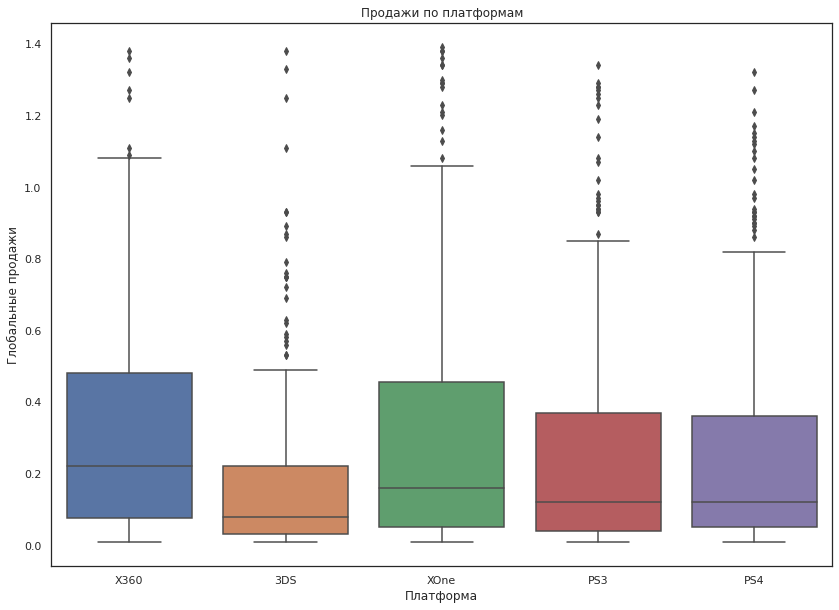

In [32]:
sns.set(style="white")

# Построение "ящика с усами" с выбросами
plt.figure(figsize=(14, 10))
sns.boxplot(x='platform', y='total_sales', data=games_top_5_platforms, order=games_top_5_platforms['platform'].unique())
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.show()

Вывод:

Наибольшие медианные продажи у платформ WiiU -> XOne -> PS4

Положение PlayStation 4 и Xbox One можно объяснить сравнительно поздним выходом на рынок

Почти у всех платформ наблюдается много выбросов - это популярные игры, а так же те, что раздавались беслпатно и тд

# Проанализируем, как влияют отзывы пользователей и критиков на продажи для платформы PS4 (выбрал её, тк она самая известная)

Построим точечную диаграмму корреляции оценок критиков и общих продаж для PS4:

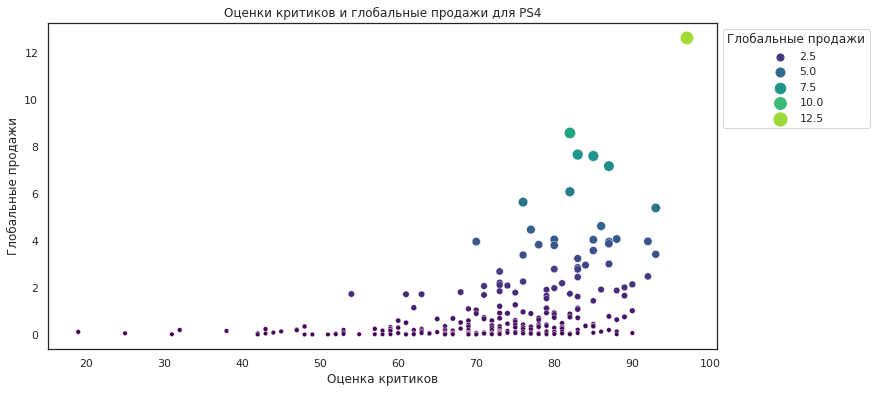

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=games[games['platform'] == 'PS4'], hue='total_sales', palette='viridis', size='total_sales', sizes=(20, 200))
plt.title('Оценки критиков и глобальные продажи для PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи')
plt.legend(title='Глобальные продажи', bbox_to_anchor=(1, 1))
plt.show()

Построим точечную диаграмму корреляции оценок пользователей и общих продаж для PS4:

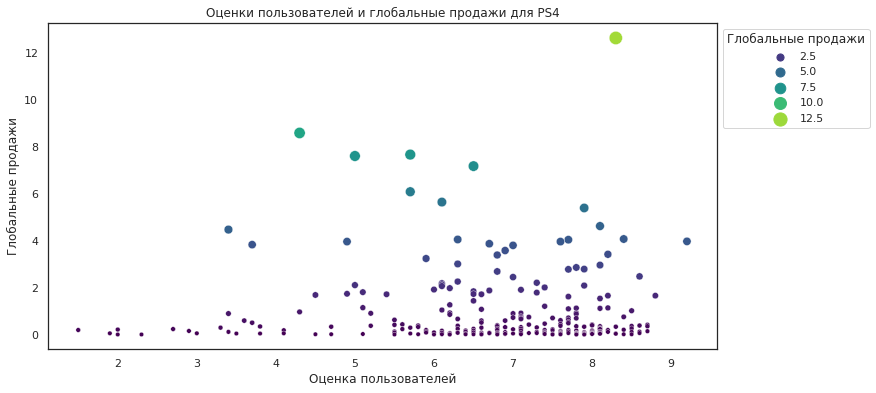

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='total_sales', data=games[games['platform'] == 'PS4'], hue='total_sales', palette='viridis', size='total_sales', sizes=(20, 200))
plt.title('Оценки пользователей и глобальные продажи для PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи')
plt.legend(title='Глобальные продажи', bbox_to_anchor=(1, 1))
plt.show()

Вырисовываются закономерности:

1. Игры с более высокими оценками обычно имеют большие продажи, что свидетельствует о том, что качество игры зачастую связано с её коммерческим успехом.

2. Пользователи и критики чаще склонны ставить высокие оценки в среднем ~7 и выше (никак не влияет на исследование)

Но есть и исключения, например, есть игры, которые получили высокие оценки, но при этом продажи остаются невысокими.

In [35]:
# Посмотрим матрицу корреляций
print("Матрица корреляций")
games[games.platform == "PS4"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


In [36]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    Int64  
 9   user_score       1192 non-null   Float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Float64(1), Int64(2), float64(5), object(4)
memory usage: 297.9+ KB


# Соотнесем выводы с продажами игр на других платформах:

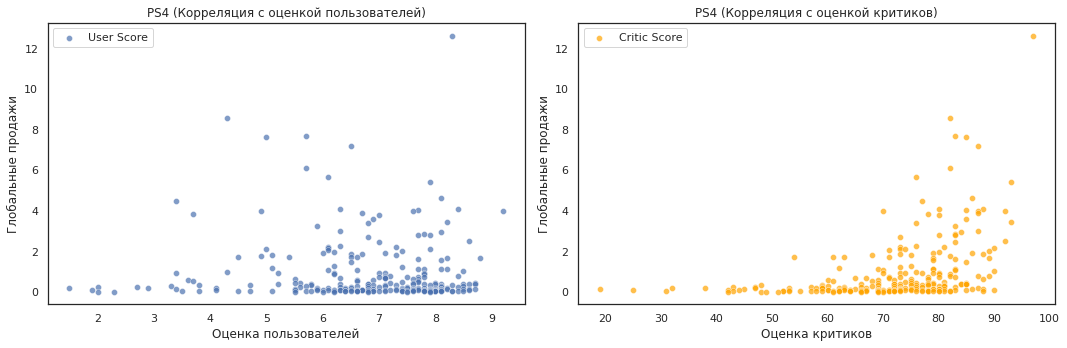

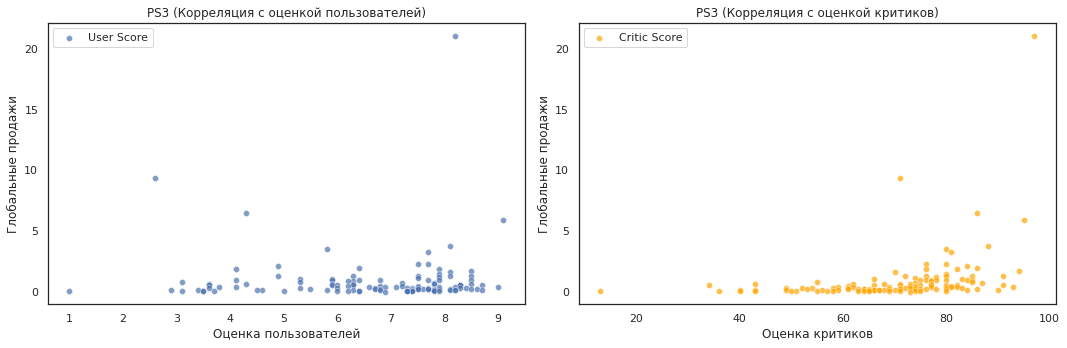

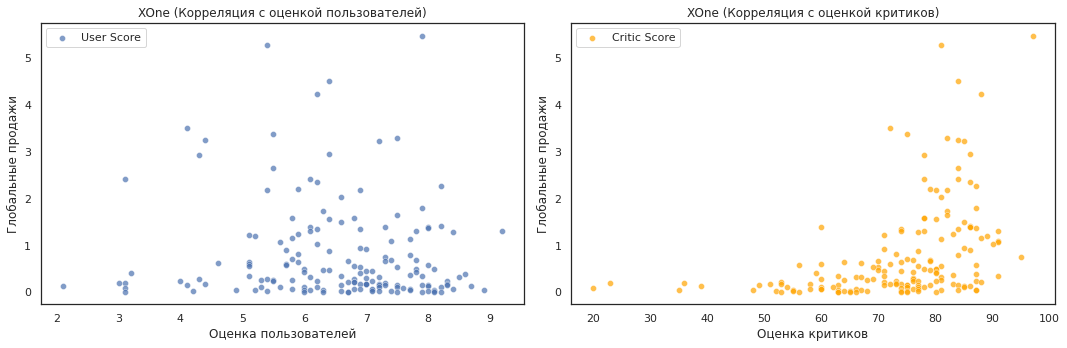

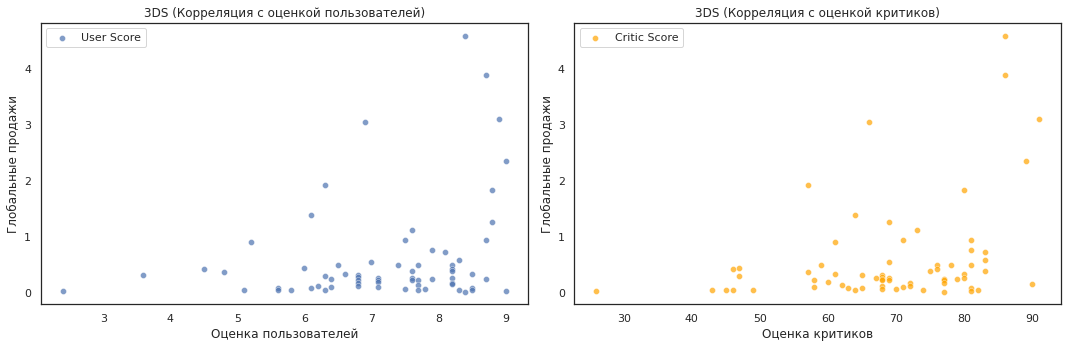

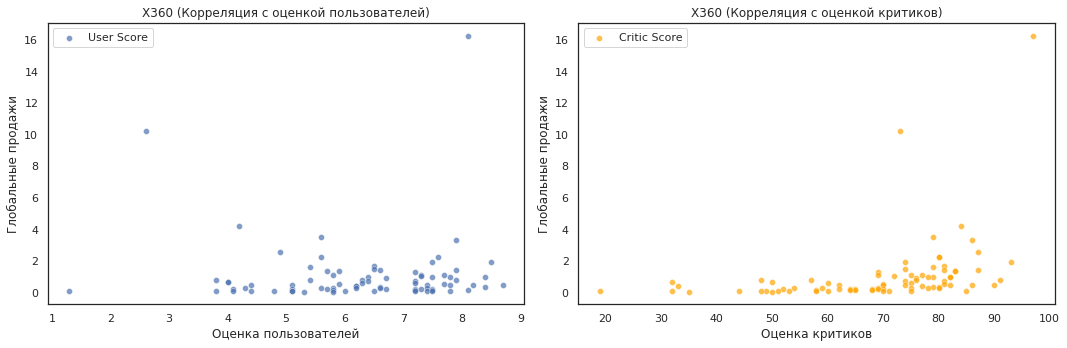

In [37]:
# Выбираем нужные платформы
top_platforms = top_5_platforms

# Фильтруем данные для выбранных платформ и числовых значений оценок
df_filtered = games[(games['platform'].isin(top_platforms)) & (games['user_score'].apply(pd.to_numeric, errors='coerce').notna()) & (games['critic_score'].apply(pd.to_numeric, errors='coerce').notna())].copy()

# Преобразуем оценки в числовой формат
df_filtered['user_score'] = pd.to_numeric(df_filtered['user_score'])
df_filtered['critic_score'] = pd.to_numeric(df_filtered['critic_score'])

# Цикл для построения точечных диаграмм с корреляцией для каждой платформы
for platform in top_platforms:
    platform_data = df_filtered[df_filtered['platform'] == platform]
    
    # Точечные диаграммы в одном ряду
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Диаграмма для User Score
    sns.scatterplot(data=platform_data, x='user_score', y='total_sales', label='User Score', alpha=0.7, ax=ax1)
    ax1.set_title(f'{platform} (Корреляция с оценкой пользователей)')
    ax1.set_xlabel('Оценка пользователей')
    ax1.set_ylabel('Глобальные продажи')
    ax1.legend()
    
    # Диаграмма для Critic Score
    sns.scatterplot(data=platform_data, x='critic_score', y='total_sales', label='Critic Score', alpha=0.7, color='orange', ax=ax2)
    ax2.set_title(f'{platform} (Корреляция с оценкой критиков)')
    ax2.set_xlabel('Оценка критиков')
    ax2.set_ylabel('Глобальные продажи')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

In [38]:
# Выбираем нужные платформы
top_platforms = top_5_platforms

# Фильтруем данные для выбранных платформ и числовых значений оценок
df_filtered = games[(games['platform'].isin(top_platforms)) & (games['user_score'].apply(pd.to_numeric, errors='coerce').notna()) & (games['critic_score'].apply(pd.to_numeric, errors='coerce').notna())].copy()

# Преобразуем оценки в числовой формат
df_filtered['user_score'] = pd.to_numeric(df_filtered['user_score'])
df_filtered['critic_score'] = pd.to_numeric(df_filtered['critic_score'])

# Создаем словарь для хранения результатов корреляций
correlation_results = {'Critic_Score': {}, 'User_Score': {}}

# Цикл для построения диаграмм рассеяния и расчета корреляций для каждой платформы
for platform in top_platforms:
    platform_data = df_filtered[df_filtered['platform'] == platform]
    
    # Расчет корреляций
    correlations = platform_data[['total_sales', 'critic_score', 'user_score']].corr()
    correlation_results['Critic_Score'][platform] = correlations['total_sales']['critic_score']
    correlation_results['User_Score'][platform] = correlations['total_sales']['user_score']

# Вывод результатов
print(f'По убыванию корреляции продаж с оценкой критиков:\n')
for platform, correlation in sorted(correlation_results['Critic_Score'].items(), key=lambda x: x[1], reverse=True):
    print(f'{platform}: {correlation}')

print('\n')

print(f'По убыванию корреляции продаж с оценкой пользователей:\n')
for platform, correlation in sorted(correlation_results['User_Score'].items(), key=lambda x: x[1], reverse=True):
    print(f'{platform}: {correlation}')

По убыванию корреляции продаж с оценкой критиков:

XOne: 0.4104220356129644
PS4: 0.4058948014583664
X360: 0.3503445460228663
3DS: 0.3392349287853139
PS3: 0.33380663565061786


По убыванию корреляции продаж с оценкой пользователей:

3DS: 0.2729904366942446
PS3: 0.022690943271124264
X360: -0.006238179532306042
PS4: -0.03362497596528892
XOne: -0.09400318326920773


По убыванию корреляции с оценкой критиков: XOne -> PS4 -> X360 -> 3DS -> PS3

По убыванию корреляции с оценкой пользователей: 3DS (у остальных корреляции нет или почти нет)

В целом, оценки критиков могут играть более важную роль в успешных продажах игр, чем оценки пользователей, за исключением случаев 3DS, где мнение игроков тоже важно.

# Посмотрим на общее распределение игр по жанрам

In [39]:
# Комментарий ревьюера
temp1, temp2 = games_top_5_platforms.total_sales.sum(), games.total_sales.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(340.65, 1090.69, 68.77)

In [40]:
distr_genre = games_top_5_platforms.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,Action,116.92
1,Sports,48.25
2,Role-Playing,44.66
3,Shooter,40.92
4,Misc,20.12
5,Fighting,17.58
6,Adventure,15.29
7,Racing,14.64
8,Platform,12.50
9,Simulation,4.78


In [41]:
# Рассчитаем распределение продаж по жанрам для всех данных
distr_genre_all = games.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)

# Выведем распределение для всех данных
print(distr_genre_all)

# Рассчитаем распределение продаж по жанрам для топовых платформ
distr_genre_top_platforms = games_top_5_platforms.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)

# Выведем распределение для топовых платформ
print(distr_genre_top_platforms)

# Рассчитаем общие продажи для всех данных и топовых платформ
total_sales_all = games.total_sales.sum()
total_sales_top_platforms = games_top_5_platforms.total_sales.sum()

# Выведем результат
print(f"Общие продажи по всем данным: {total_sales_all}")
print(f"Общие продажи по топ-5 платформам: {total_sales_top_platforms}")

           genre  total_sales
0         Action       321.87
1        Shooter       232.98
2         Sports       150.65
3   Role-Playing       145.89
4           Misc        62.82
5       Platform        42.63
6         Racing        39.89
7       Fighting        35.31
8      Adventure        23.64
9     Simulation        21.76
10      Strategy        10.08
11        Puzzle         3.17
           genre  total_sales
0         Action       116.92
1         Sports        48.25
2   Role-Playing        44.66
3        Shooter        40.92
4           Misc        20.12
5       Fighting        17.58
6      Adventure        15.29
7         Racing        14.64
8       Platform        12.50
9     Simulation         4.78
10      Strategy         3.20
11        Puzzle         1.79
Общие продажи по всем данным: 1090.69
Общие продажи по топ-5 платформам: 340.65


Вывод:

Больше всего игр жанра Action, потом идут Shooter, Sports, Role-Playing и тд

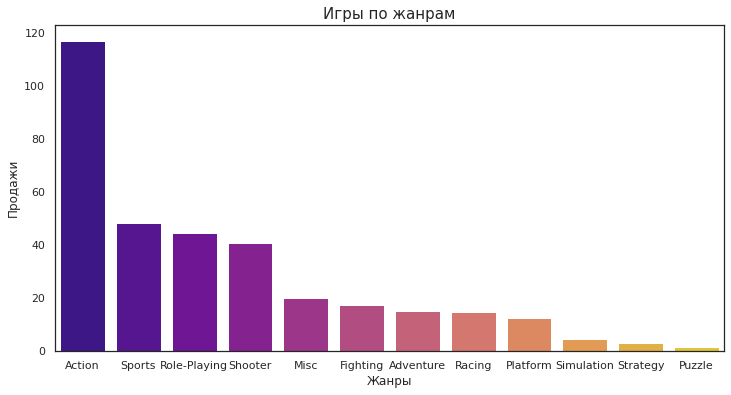

In [42]:
# Проверим распределение по жанрам наглядно
plt.figure(figsize=(12, 6))
plt.title('Игры по жанрам', fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales', palette='plasma')
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Продажи')
plt.show()

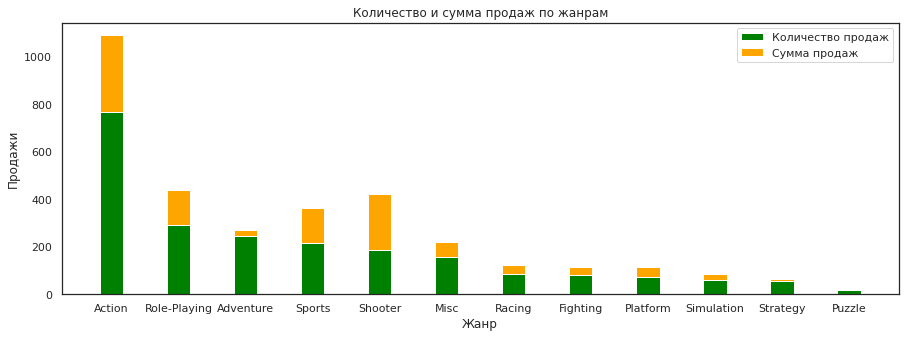

In [43]:
# Не нашёл иного способа сделать количество и сумму продаж на одной оси
# (если делать через secondary_y - получается 2 оси по краям графика с 800 и 300 соответственно)
pivot = games.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(15, 5))

# Размер каждого столбца
bar_width = 0.35

# Создаем столбцы для количества продаж
bars1 = ax.bar(pivot.index, pivot['name'], width=bar_width, label='Количество продаж', color='green')

# Создаем столбцы для суммы продаж
bars2 = ax.bar(pivot.index, pivot['total_sales'], width=bar_width, label='Сумма продаж', color='orange', bottom=pivot['name'])

# Настройки осей и графика
ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи')
ax.set_title('Количество и сумма продаж по жанрам')
ax.legend()

# Показываем график
plt.show()

In [44]:
ratio_genres = games.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

In [45]:
# Можно отсортировать игры по прибыльности:
ratio_genres['ratio'] = ratio_genres['total_sales'] / ratio_genres['name']
ratio_genres.sort_values(by='ratio', ascending=False)

,name,total_sales,ratio
genre,,,
Shooter,187,232.98,1.245882
Sports,214,150.65,0.703972
Platform,74,42.63,0.576081
Role-Playing,292,145.89,0.499623
Racing,85,39.89,0.469294
Fighting,80,35.31,0.441375
Action,766,321.87,0.420196
Misc,155,62.82,0.405290
Simulation,62,21.76,0.350968


Вывод:

Больше всего покупают игры жанра Action, далее идут Shooter и Sports

Adventure игр выпускается относительно много, но они невостребованы

Самый прибылный жанр - Shooter Самый не прибыльный - Adventure

# Шаг 4. Составьте портрет пользователя каждого региона

Определим самые популярные платформы по регионам

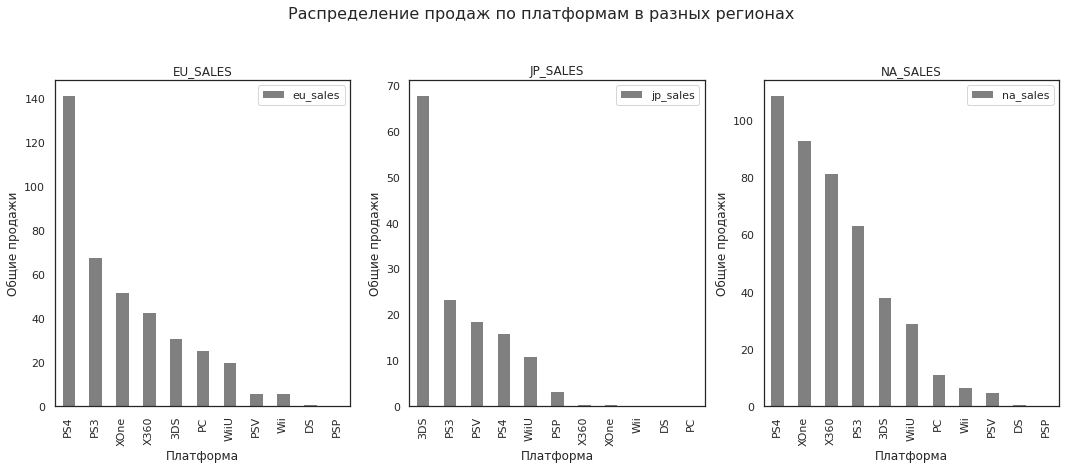

In [46]:
# Группировка данных по платформам и суммирование продаж в каждом регионе
platform_sales = games.groupby('platform')[['eu_sales', 'jp_sales', 'na_sales']].sum()

# Создание подграфиков для каждого региона
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Увеличиваем размер диаграмм

# Цикл по регионам
for i, region in enumerate(['eu_sales', 'jp_sales', 'na_sales']):
    # Выбор данных для текущего региона
    region_data = platform_sales[[region]].sort_values(by=region, ascending=False)
    
    # Построение столбчатой диаграммы
    region_data.plot(kind='bar', ax=axes[i], color=['gray'])
    
    # Настройка заголовка
    axes[i].set_title(region.upper())
    axes[i].set_ylabel('Общие продажи')
    axes[i].set_xlabel('Платформа')

# Установка общего заголовка
plt.suptitle('Распределение продаж по платформам в разных регионах', y=1.05, fontsize=16)

# Показ графика
plt.show()

В Европе популярны: PS4 -> PS3 -> XOne -> X360 -> 3DS

В Японии популярны: 3DS -> PS3 -> PSV -> PS4 -> WiiU

В Северной Америке популярны: PS4 -> XOne -> X360 -> PS3 -> 3DS

# Определим самые популярные жанры по регионам:

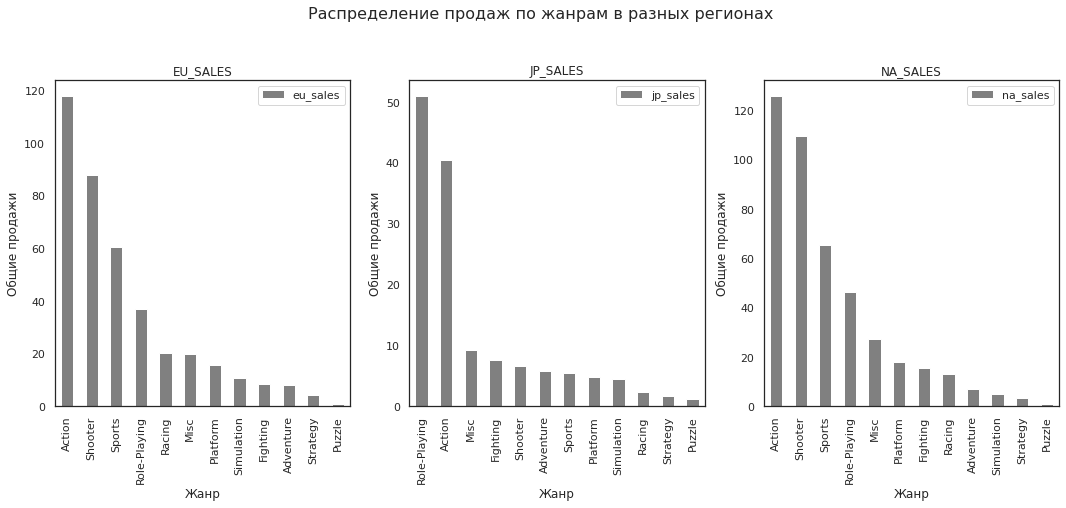

In [47]:
# Группировка данных по платформам и суммирование продаж в каждом регионе
platform_sales = games.groupby('genre')[['eu_sales', 'jp_sales', 'na_sales']].sum()

# Создание подграфиков для каждого региона
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Увеличиваем размер диаграмм

# Цикл по регионам
for i, region in enumerate(['eu_sales', 'jp_sales', 'na_sales']):
    # Выбор данных для текущего региона
    region_data = platform_sales[[region]].sort_values(by=region, ascending=False)
    
    # Построение столбчатой диаграммы
    region_data.plot(kind='bar', ax=axes[i], color=['gray'])
    
    # Настройка заголовка
    axes[i].set_title(region.upper())
    axes[i].set_ylabel('Общие продажи')
    axes[i].set_xlabel('Жанр')

# Установка общего заголовка
plt.suptitle('Распределение продаж по жанрам в разных регионах', y=1.05, fontsize=16)

# Показ графика
plt.show()

ВЫВОД:

Пользователи Европы и Северной Америки играют в целом в одни и те же консоли и у них почти общая игровая индустрия, поэтому популярны жанры - Action, Sports, Shooter. В Японии преобладают пользователи с портативными консолями, в которые можно играть не только дома, поэтому они предпочитают жанр - Role-Playing и почти не играют в игры с жанром - Shooter(это банально неудобно).

# Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

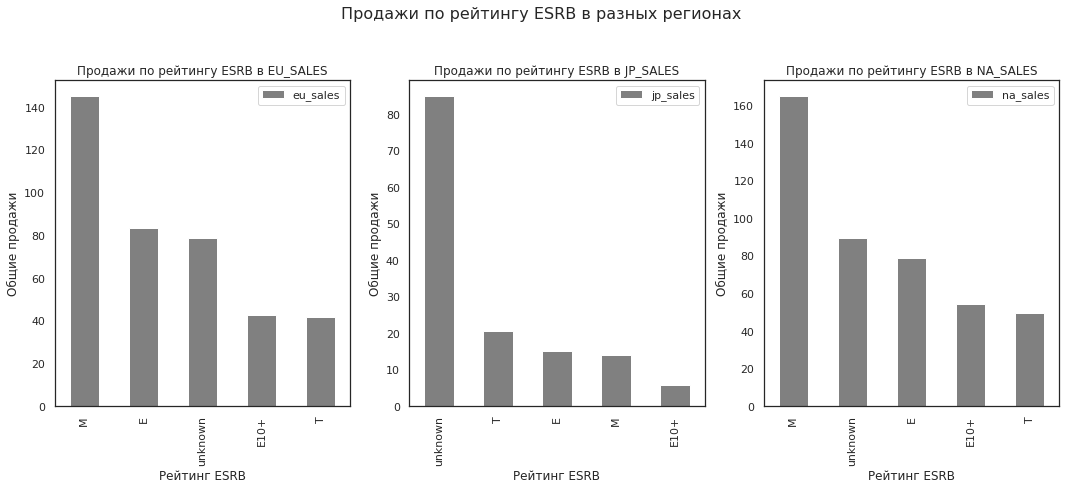

In [48]:
# Группировка данных по рейтингу ESRB и суммирование продаж в каждом регионе
esrb_sales = games.groupby('rating')[['eu_sales', 'jp_sales', 'na_sales']].sum()

# Создание подграфиков для каждого региона
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Увеличиваем размер диаграмм

# Цикл по регионам
for i, region in enumerate(['eu_sales', 'jp_sales', 'na_sales']):
    # Выбор данных для текущего региона
    region_data = esrb_sales[[region]].sort_values(by=region, ascending=False)
    
    # Построение столбчатой диаграммы
    region_data.plot(kind='bar', ax=axes[i], color=['gray'])  # Используем цвета для разных регионов
    
    # Настройка заголовка
    axes[i].set_title(f'Продажи по рейтингу ESRB в {region.upper()}')
    axes[i].set_ylabel('Общие продажи')
    axes[i].set_xlabel('Рейтинг ESRB')

# Установка общего заголовка
plt.suptitle('Продажи по рейтингу ESRB в разных регионах', y=1.05, fontsize=16)

# Показ графика
plt.show()

Да, рейтинг влияет на продажи в отдельных регионах. В Северной Америке и в Европе картина практически одинаковая, но игры с рейтингом eC в основном покупали только в Северной Америке. Большая часть выручки получено с игр с рейтингом "E".

В Японии же первое место занимает рейтинг "Не определен", ведь скорее всего не все игры могут подходить под критерии американского рейтинга ESRB

# Шаг 5. Проверка гипотез

# 1 гипотеза:

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [49]:
# Преобразование данных к числовому типу и удаление пропущенных значений
sample_1 = games[games['platform']=="XOne"]['user_score'].dropna().astype(float) # Оценки пользователей Xbox One
sample_2 = games[games['platform']=="PC"]['user_score'].dropna().astype(float)

alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results_1 = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var=False)

print('p-значение:', results_1.pvalue)

if results_1.pvalue < alpha:
    print("Уровень значимости: 0.05")
    print("Отвергаем нулевую гипотезу.")
    print("Существует статистически значимая разница между средними пользовательскими рейтингами Xbox One и PC.")
else:
    print("Уровень значимости: 0.05")
    print("Не получилось отвергнуть нулевую гипотезу.")
    print("Нет статистически значимой разницы между средними пользовательскими рейтингами Xbox One и PC.")

p-значение: 0.14759594013430463
Уровень значимости: 0.05
Не получилось отвергнуть нулевую гипотезу.
Нет статистически значимой разницы между средними пользовательскими рейтингами Xbox One и PC.


ВЫВОД:

Не получилось отвергнуть нулевую гипотезу.
Нет статистически значимой разницы между средними пользовательскими рейтингами Xbox One и PC.

Формулировка гипотез:

- H0 (нулевая гипотеза): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- H1 (альтернативная гипотеза): Средние пользовательские рейтинги платформ Xbox One и PC разные.

- Критерий для проверки гипотез:

- Использован двухвыборочный двусторонний t-тест (ttest_ind) для независимых выборок.
- Параметр equal_var=False был установлен в false, так как мы предполагаем(по умолчанию), что дисперсии в выборках могут быть разными.

- Выборка сформирована для каждой платформы (Xbox One и PC).
- Мы хотим определить, есть ли статистически значимая разница между пользовательскими рейтингами двух платформ.
- Использование t-теста обосновано, так как мы работаем с числовыми данными и сравниваем средние значения двух независимых выборок.



# 2 гипотеза:

H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [50]:
# Преобразование данных к числовому типу и удаление пропущенных значений
sample_3 = games[games['genre']=="Action"]['user_score'].dropna().astype(float)
sample_4 = games[games['genre']=="Sports"]['user_score'].dropna().astype(float)

alpha = 0.05  # Критический уровень статистической значимости

results_2 = st.ttest_ind(
    sample_3,
    sample_4,
    equal_var = False)

print('p-значение:', results_2.pvalue)

if results_2.pvalue < alpha:
    print("Уровень значимости: 0.05")
    print("Отвергаем нулевую гипотезу.")
    print("Существует статистически значимая разница между средними пользовательскими рейтингами жанров Action и Sports.")
else:
    print("Уровень значимости: 0.05")
    print("Не получилось отвергнуть нулевую гипотезу.")
    print("Нет статистически значимой разницы между средними пользовательскими рейтингами жанров Action и Sports.")

p-значение: 1.4460039700704315e-20
Уровень значимости: 0.05
Отвергаем нулевую гипотезу.
Существует статистически значимая разница между средними пользовательскими рейтингами жанров Action и Sports.


ВЫВОД:

Отвергаем нулевую гипотезу.
Существует статистически значимая разница между средними пользовательскими рейтингами жанров Action и Sports.

Формулировка гипотез:
- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- H1: Средние пользовательские рейтинги жанров Action и Sports разные.

Критерий для проверки гипотез:
- Использован двухвыборочный двусторонний t-тест (ttest_ind) для независимых выборок.
- Параметр equal_var=False был установлен в false, так как мы предполагаем(по умолчанию), что дисперсии в выборках могут быть разными.

Обоснование:
- Выборка сформирована для каждого жанра (Action и Sports).
- Мы хотим определить, есть ли статистически значимая разница между пользовательскими рейтингами двух жанров.
- Использование t-теста обосновано, так как мы работаем с числовыми данными и сравниваем средние значения двух независимых выборок.

# Шаг 6. Общий вывод:

# Шаг 1. Открытие файла и изучение данных

В процессе открытия файла и первичного изучения данных было выявлено несколько ключевых аспектов:

- Пропуски данных: Обнаружено значительное количество пропусков в различных столбцах, что может повлиять на дальнейший анализ. Необходимо рассмотреть стратегии обработки пропусков в зависимости от контекста и значимости этих данных.

- Некорректные типы данных: В столбцах Year_of_Release и Critic_Score указан тип данных float, в то время как ожидается тип int. Также столбец User_Score имеет тип object, хотя его следовало бы привести к типу float. Это потребует коррекции для удобства последующего анализа.

- Ненужные пропуски: В столбцах Name и Genre выделены пропуски, которые, вероятно, могли возникнуть из-за отсутствия оценки игры или технических ошибок. Определение причины пропусков позволит лучше понять, как их обработать.


# Шаг 2. Подготовка данных

На этапе подготовки данных были проведены важные шаги для обеспечения качественного анализа. Обнаружено значительное количество пропусков в столбцах, связанных с оценками и рейтингами игр. Вероятно, это обусловлено новизной некоторых игр, отсутствием данных или техническими проблемами при сборе информации.

- Была проведена проверка на дубликаты
- Неизвестные значения в столбце 'rating' были обнаружены и отмечены как "unknown", что подразумевает отсутствие известной информации о рейтинге для соответствующих игр.

- Важно отметить, что значение 'tbd' в столбце с оценкой пользователей требует дополнительной обработки, так как оно указывает на то, что данные оценки пока не были определены. Это может быть связано с тем, что некоторые игры не получили достаточного количества пользовательских оценок к моменту сбора данных.

- Суммарные продажи в регионах были рассчитаны и добавлены в отдельный столбец, что предоставит дополнительную информацию о коммерческом успехе каждой игры.


# Шаг 3. Исследовательский анализ данных

Количество выпущенных игр в разные годы:

- Данные за все периоды до 1994 года были отсеяны, начиная с этого года виден рост выпуска игр, что делает более актуальным использование данных с 1994 года и новее.

Продажи по платформам:

- Актуальный период для анализа выбран с 2013 года.
- Платформы PS4, XOne и 3DS лидируют по продажам к концу 2016 года.
- На графике "ящик с усами" видны медианные продажи, а также выбросы, представляющие популярные и успешные игры.

Влияние отзывов на продажи:

- Построены диаграммы рассеяния и рассчитаны корреляции между оценками критиков и пользователей с продажами.
- Оценки критиков кажутся более значимыми для успеха игр, нежели оценки пользователей, за исключением определенных платформ. Корреляции для различных платформ разнятся.

Общее распределение игр по жанрам:

- Самые популярные жанры: Action, Shooter, Sports
- Самые прибыльные жанры: Shooter, Action, Sports
- Adventure является менее прибыльным.

# Шаг 4. Портрет пользователя каждого региона

Популярные платформы по регионам:

- Европа: PS4, PS3, XOne, X360, 3DS
- Япония: 3DS, PS3, PSV, PS4, WiiU
- Северная Америка: PS4, XOne, X360, PS3, 3DS

Вывод: Пользователи Европы и Северной Америки предпочитают схожие платформы и имеют схожий вкус в жанрах (Action, Sports, Shooter). В Японии преобладают портативные консоли, а предпочтения в жанрах склоняются к Role-Playing, а жанр Shooter менее популярен.

Влияние рейтинга ESRB на продажи:

- Северная Америка и Европа: Высокие продажи у игр с рейтингом "E" (Everyone)
- В Японии менее выраженное влияние, и первое место занимает рейтинг "Не определен".

Вывод: Рейтинг ESRB оказывает влияние на предпочтения в Северной Америке и Европе, где игры с рейтингом "E" наиболее популярны. В Японии предпочтения могут быть менее зависимы от данного рейтинга.

# Шаг 5. Проверка гипотез

Результаты статистических тестов указывают на отсутствие статистически значимой разницы в средних пользовательских рейтингах между платформами Xbox One и PC. Однако, когда рассматриваются жанры Action и Sports, обнаруживается статистически значимая разница в средних пользовательских рейтингах. Эти результаты могут быть использованы при принятии решений в рекламных кампаниях и стратегии продвижения игр.

# Цель исследования:

Цель проекта - определить, на что потратить рекламный бюджет.

# Рекомендации для рекламного отдела:

Сосредоточиться на платформах PS4, XOne, 3DS.

Предпочтительные жанры: Action, Sports, Shooter, Role-playing.

Учитывать региональные особенности при планировании рекламных кампаний:
- Сосредоточиться на выпуске игр жанров Action, Sports, Shooter для консолей PS4, XOne для рынков Европы и Северной Америки
- Сосредоточиться на выпуске игр жанра Role-playing для консолей 3DS для рынка Японии

Рассмотреть влияние рейтинга ESRB, обращая внимание на различия между регионами:
- Сосредоточиться на выпуске игр рейтинга E для рынков Европы и Северной Америки